IMport Dependancies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read the CSV file

In [2]:
df = pd.read_csv("MSFT.csv")

Check the Information in the Dataset

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,1/3/2017,62.790001,62.840000,62.130001,62.580002,57.807823,20694100
1,1/4/2017,62.480000,62.750000,62.119999,62.299999,57.549179,21340000
2,1/5/2017,62.189999,62.660000,62.029999,62.299999,57.549179,24876000
3,1/6/2017,62.299999,63.150002,62.040001,62.840000,58.047993,19922900
4,1/9/2017,62.759998,63.080002,62.540001,62.639999,57.863243,20382700


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume
1421,8/25/2022,277.329987,279.019989,274.519989,278.850006,278.850006,16583400
1422,8/26/2022,279.079987,280.339996,267.980011,268.089996,268.089996,27532500
1423,8/29/2022,265.850006,267.399994,263.850006,265.230011,265.230011,20338500
1424,8/30/2022,266.670013,267.049988,260.660004,262.970001,262.970001,22767100
1425,8/31/2022,265.390015,267.109985,261.329987,261.470001,261.470001,24728900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1426 non-null   object 
 1   Open       1426 non-null   float64
 2   High       1426 non-null   float64
 3   Low        1426 non-null   float64
 4   Close      1426 non-null   float64
 5   Adj_Close  1426 non-null   float64
 6   Volume     1426 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.1+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1.426000e+03
mean,169.561353,171.243268,167.753464,169.588822,165.923293,2.890647e+07
std,82.510456,83.402749,81.533050,82.509972,83.539829,1.262903e+07
min,62.189999,62.660000,61.950001,62.299999,57.549179,7.425600e+06
25%,98.414999,99.912503,97.302502,98.444999,93.971957,2.075820e+07
50%,142.135002,144.700005,139.805001,141.455002,137.402313,2.568230e+07
75%,243.832501,245.525005,241.487496,243.752502,240.720517,3.318965e+07
max,344.619995,349.670013,342.200012,343.109985,340.882782,1.112421e+08


In [7]:
df.shape

(1426, 7)

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

Visualization of Dataset

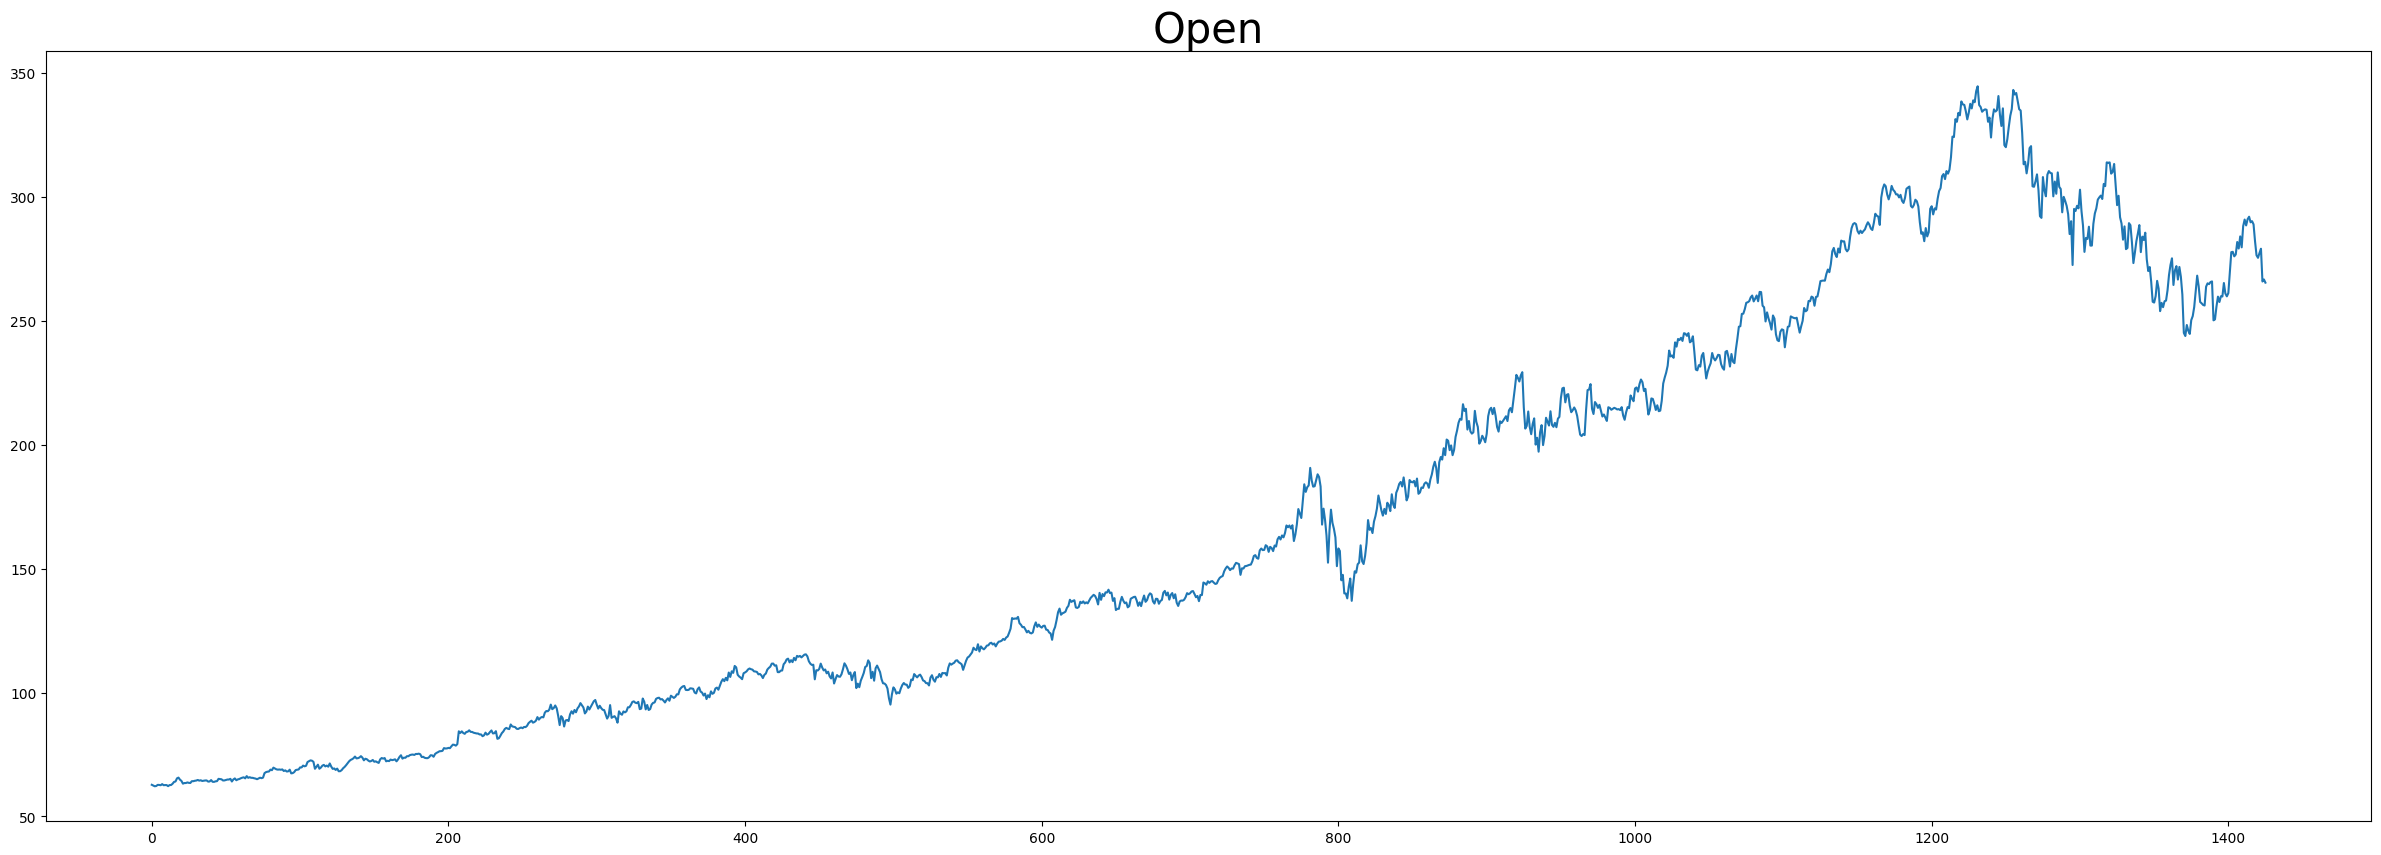

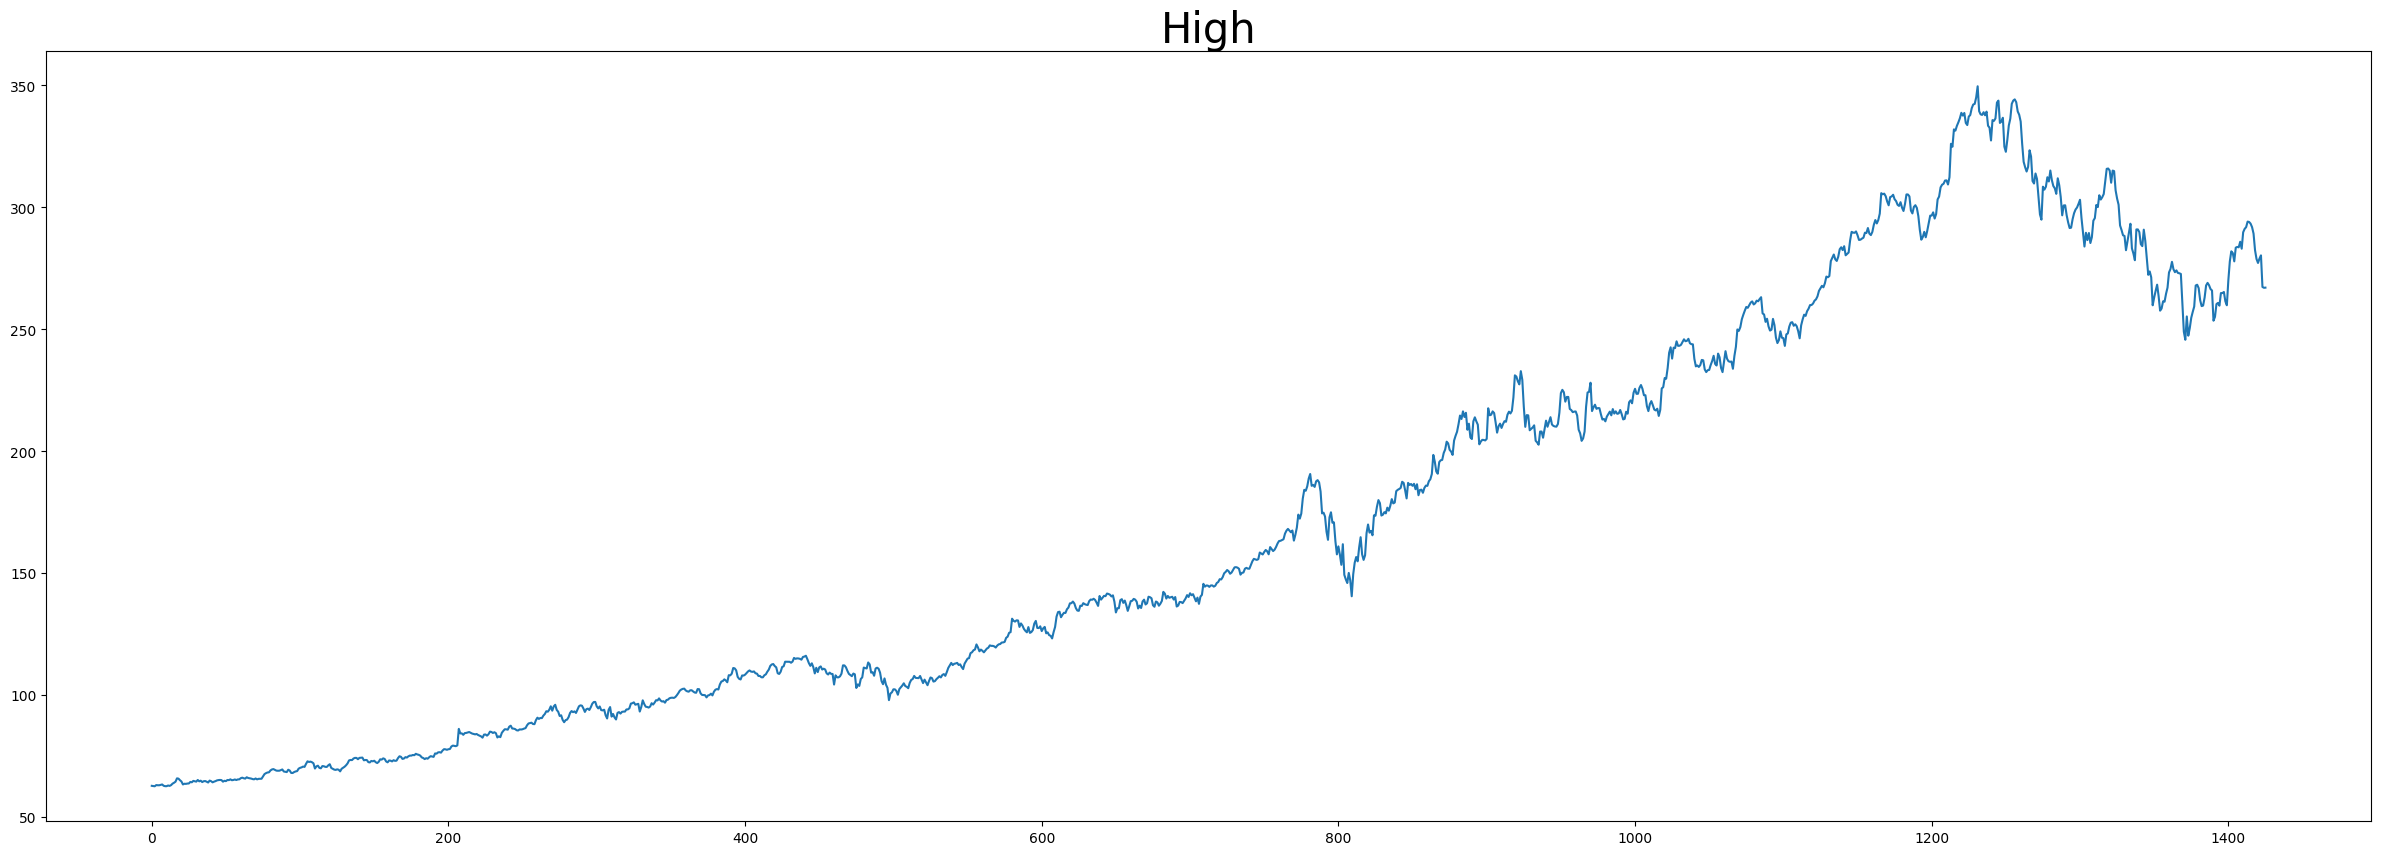

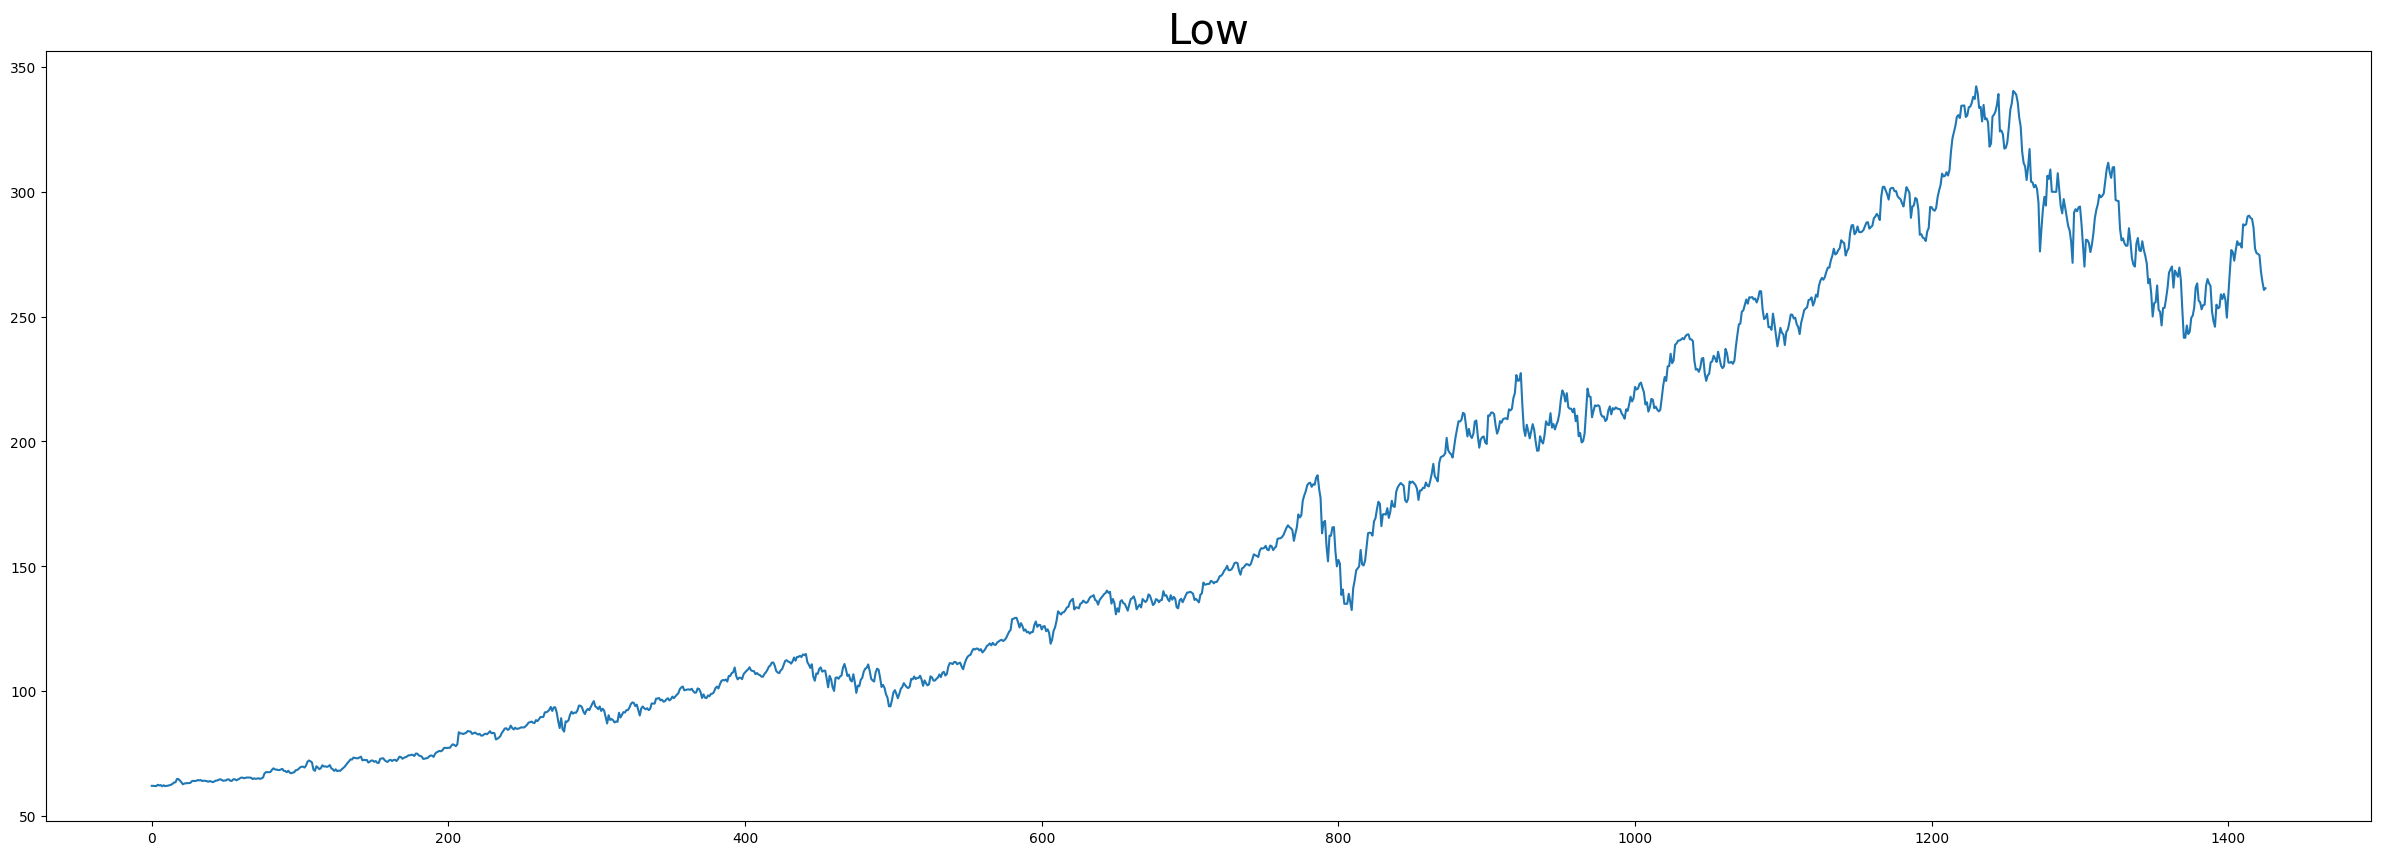

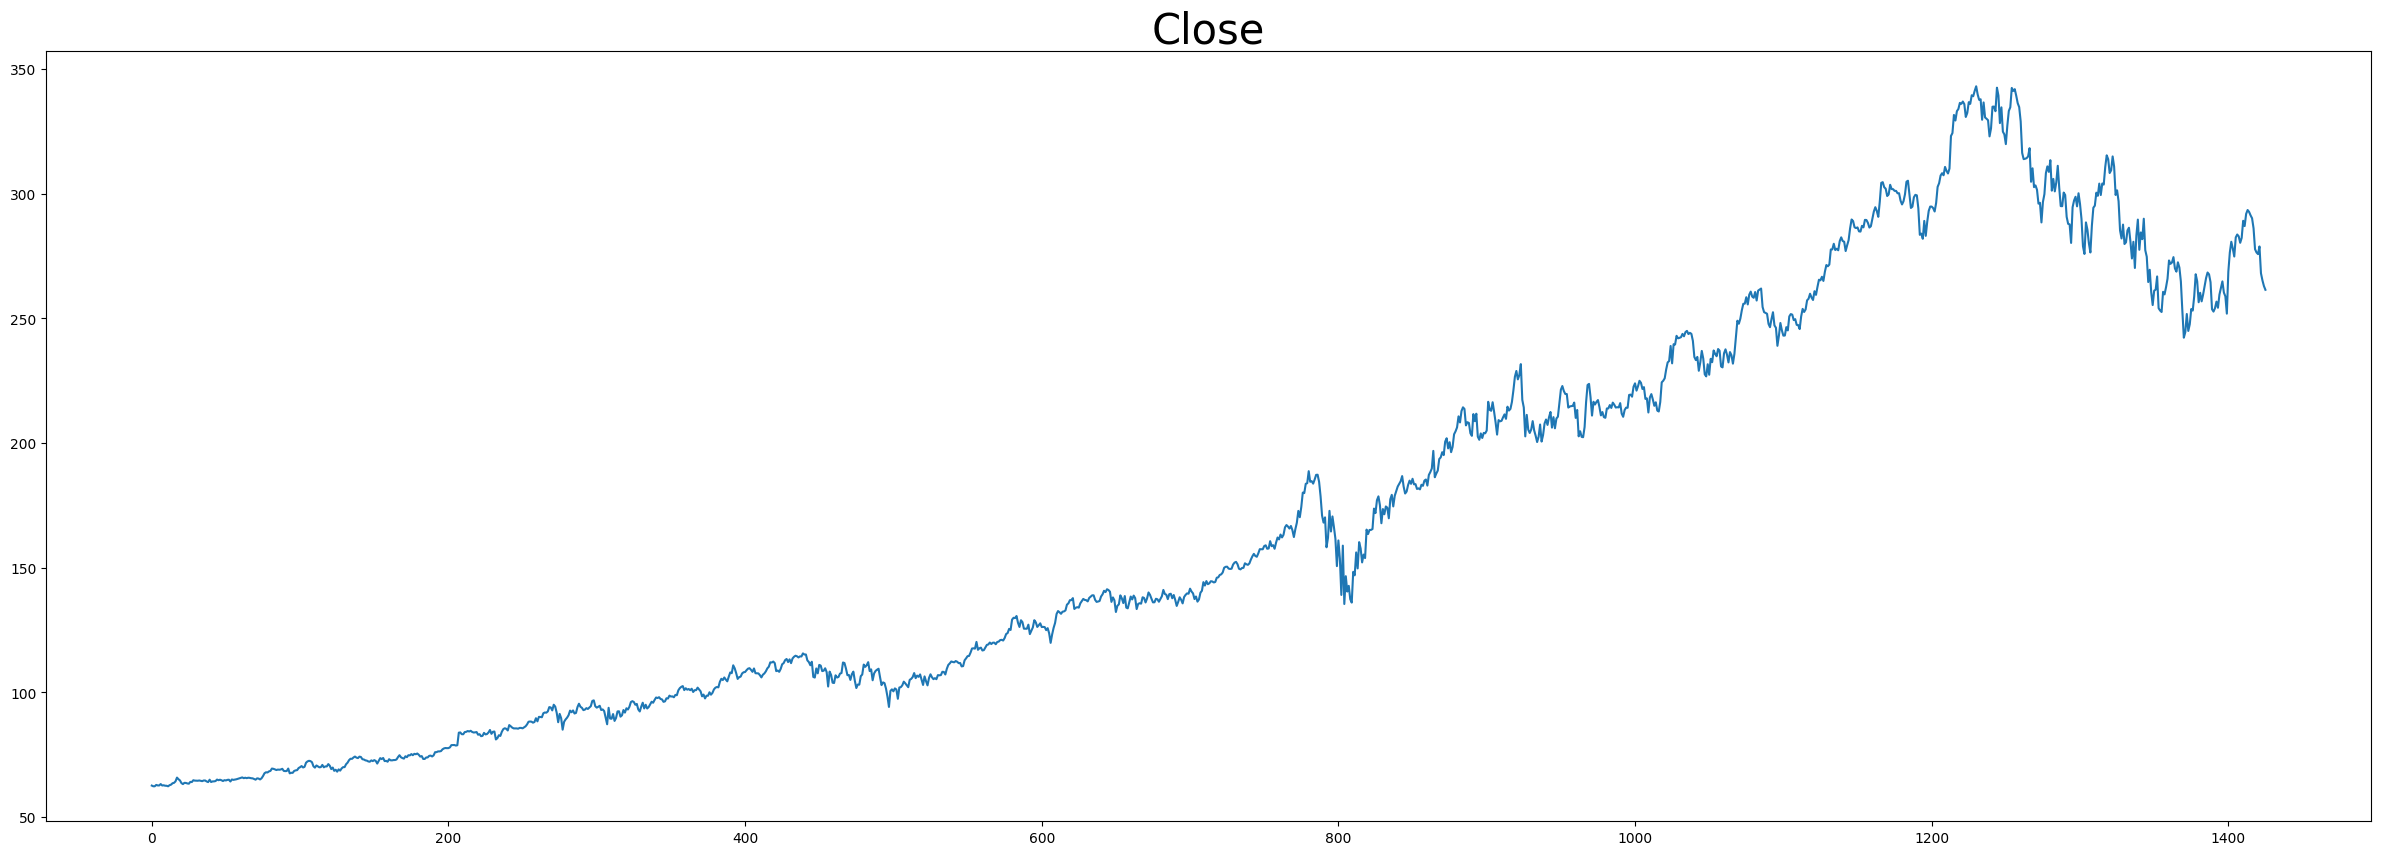

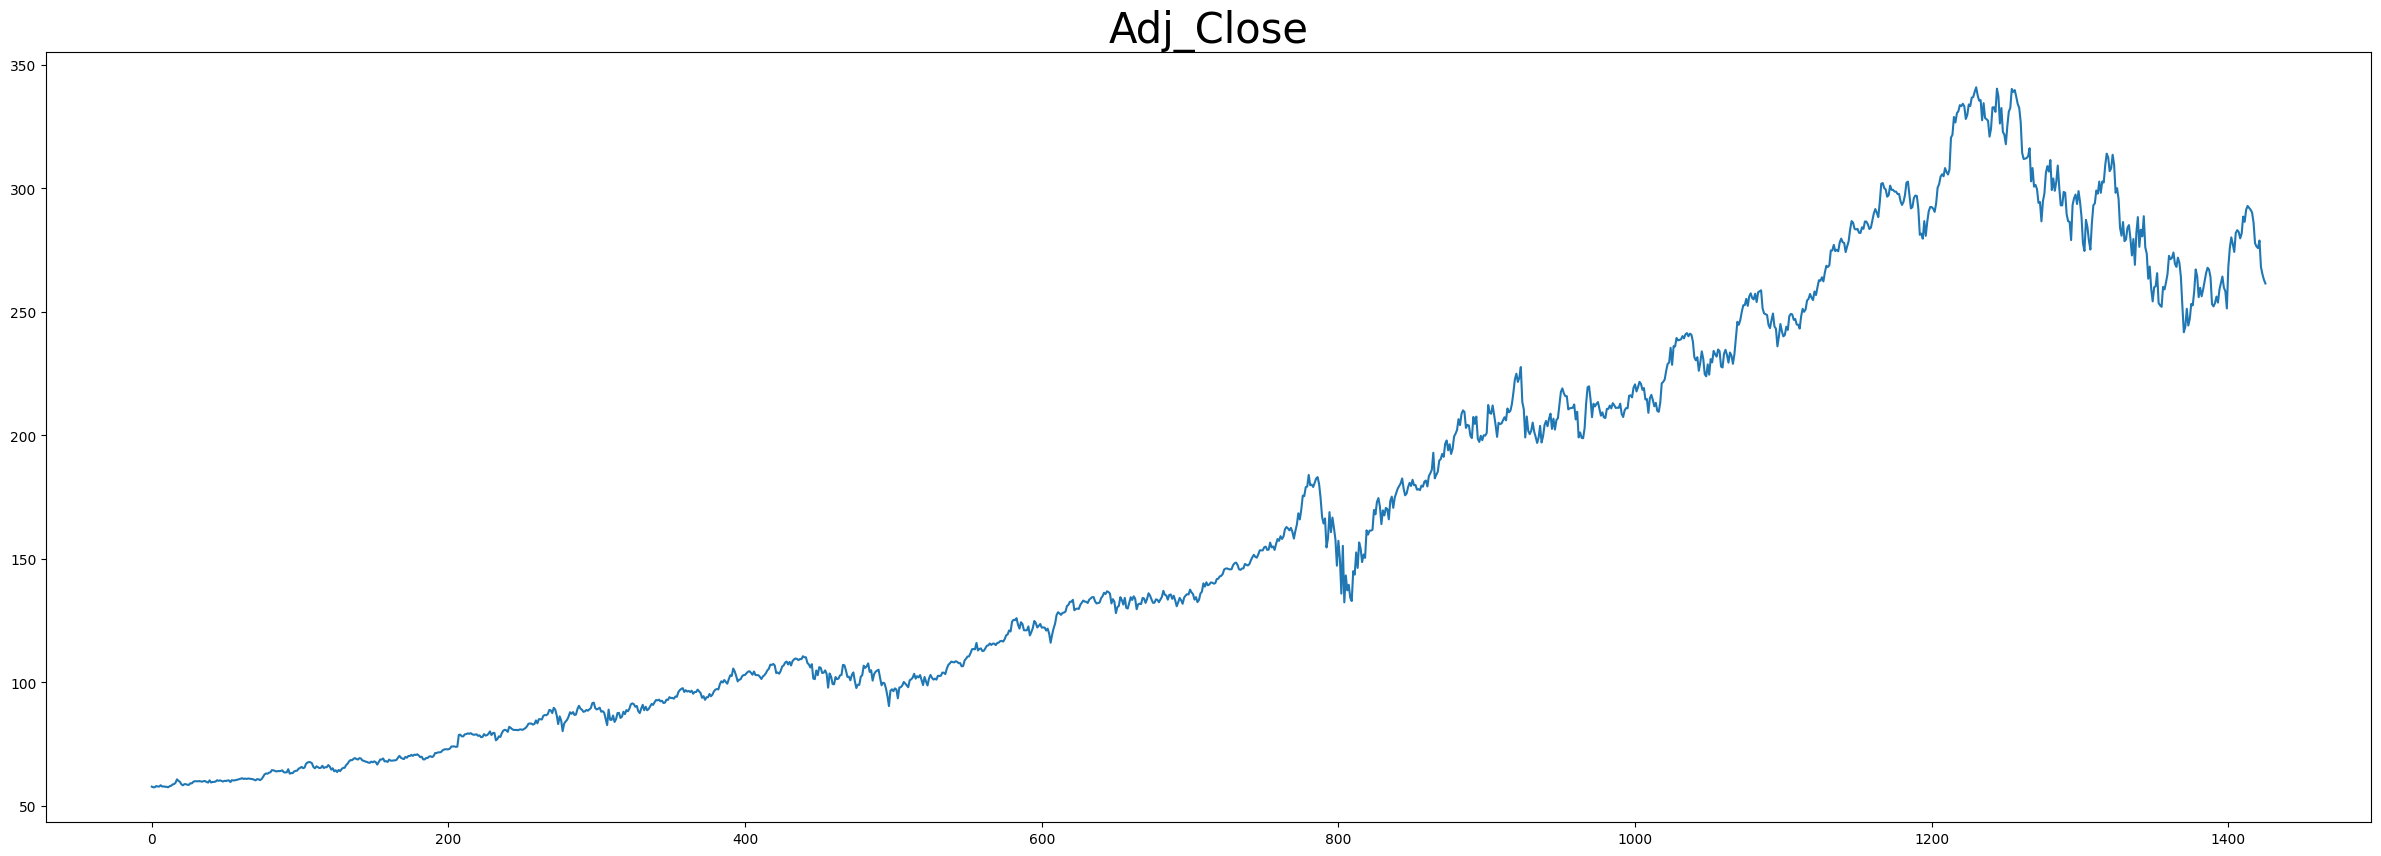

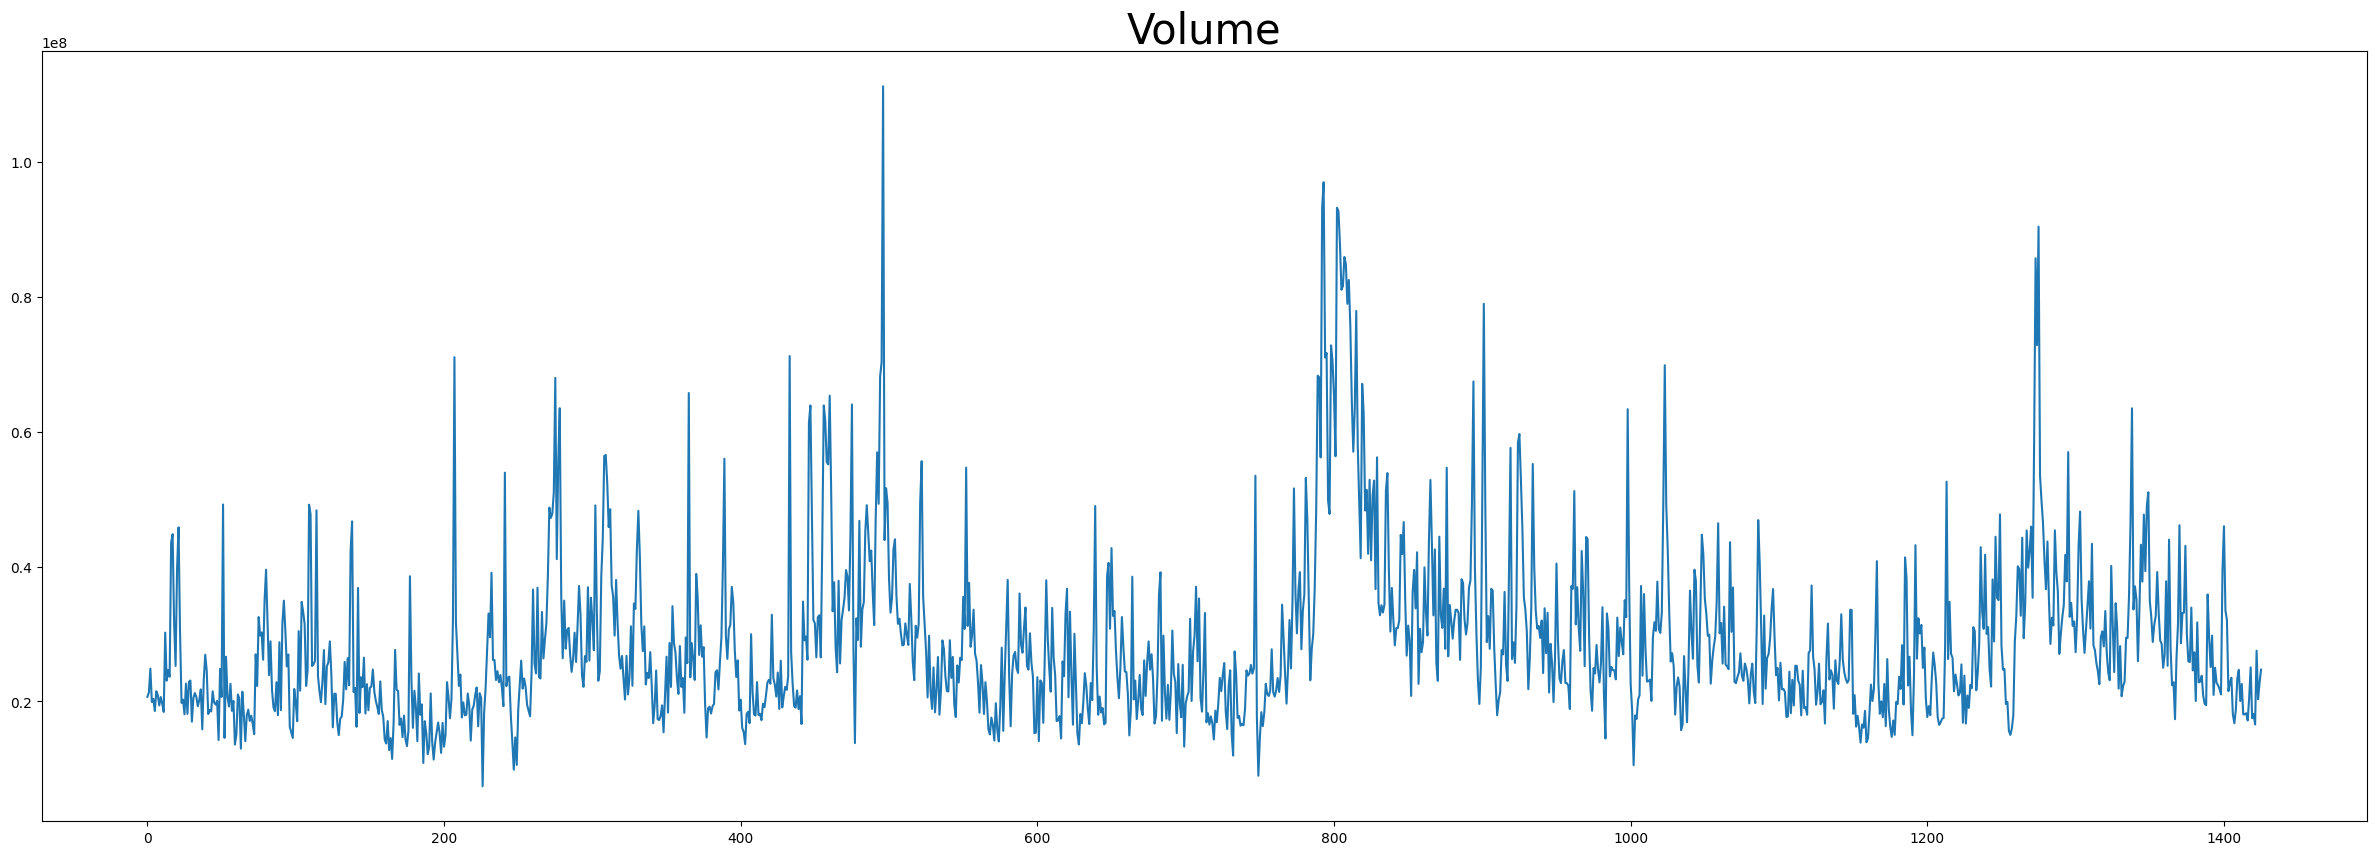

In [11]:
plt.figure(num=None, figsize=(30,10), facecolor="w", edgecolor="k")
plt.title("Open", fontsize = 30)
plt.plot(df.Open)

plt.figure(num=None, figsize=(30,10), facecolor="w", edgecolor="k")
plt.title("High", fontsize = 30)
plt.plot(df.High)

plt.figure(num=None, figsize=(30,10), facecolor="w", edgecolor="k")
plt.title("Low", fontsize = 30)
plt.plot(df.Low)

plt.figure(num=None, figsize=(30,10), facecolor="w", edgecolor="k")
plt.title("Close", fontsize = 30)
plt.plot(df.Close)

plt.figure(num=None, figsize=(30,10), facecolor="w", edgecolor="k")
plt.title("Adj_Close", fontsize = 30)
plt.plot(df.Adj_Close)

plt.figure(num=None, figsize=(30,10), facecolor="w", edgecolor="k")
plt.title("Volume", fontsize = 30)
plt.plot(df.Volume)

Set date as Index

In [12]:
df.set_index("Date", inplace=True)

Text(0.5, 0, 'Date')

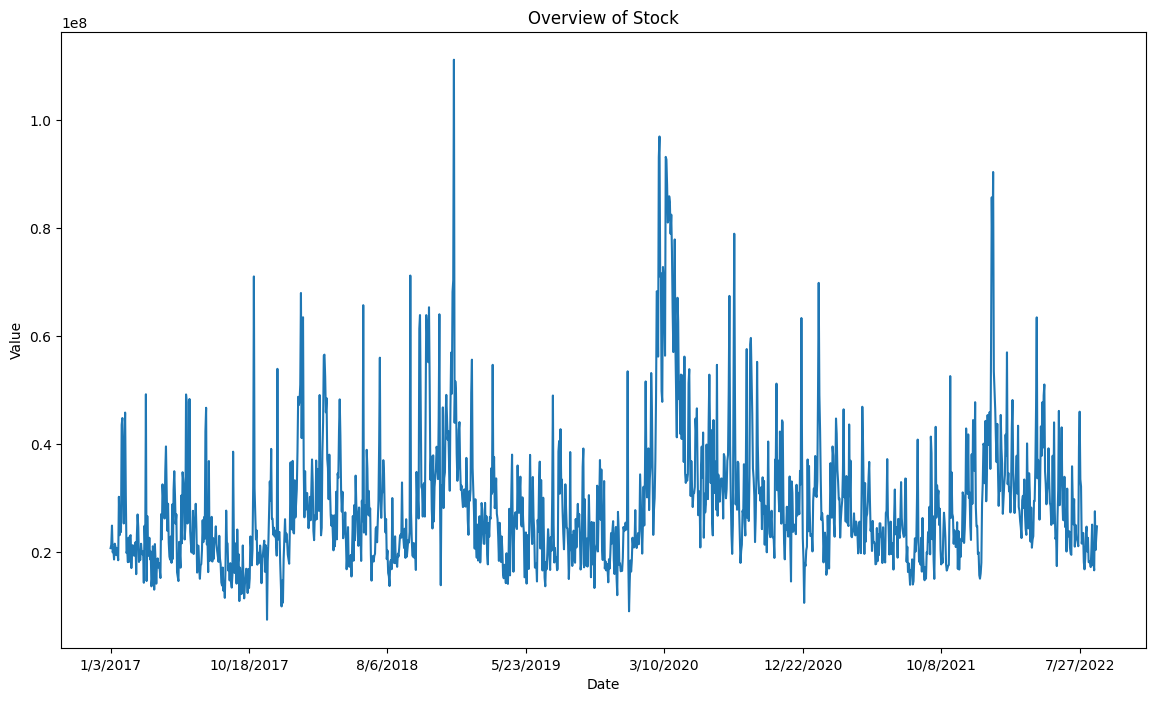

In [13]:
df["Volume"].plot(kind="line", figsize=(14,8))
plt.title("Overview of Stock")
plt.ylabel("Value")
plt.xlabel("Date")


Text(0.5, 0, 'Date')

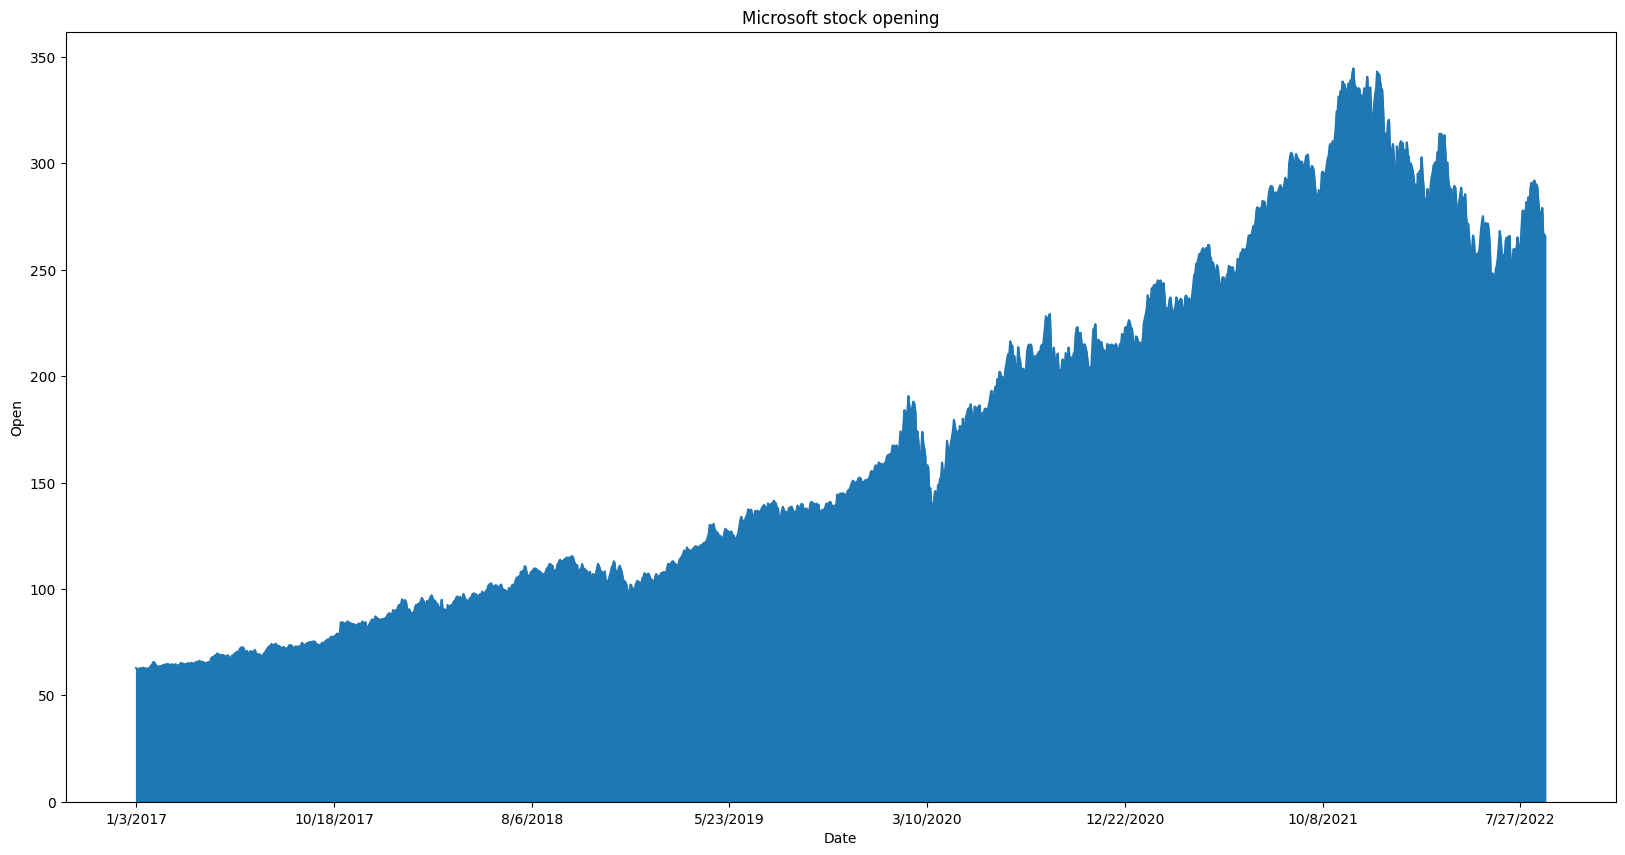

In [14]:
df.Open.plot(kind="area", figsize=(20,10))
plt.title("Microsoft stock opening")
plt.ylabel("Open")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

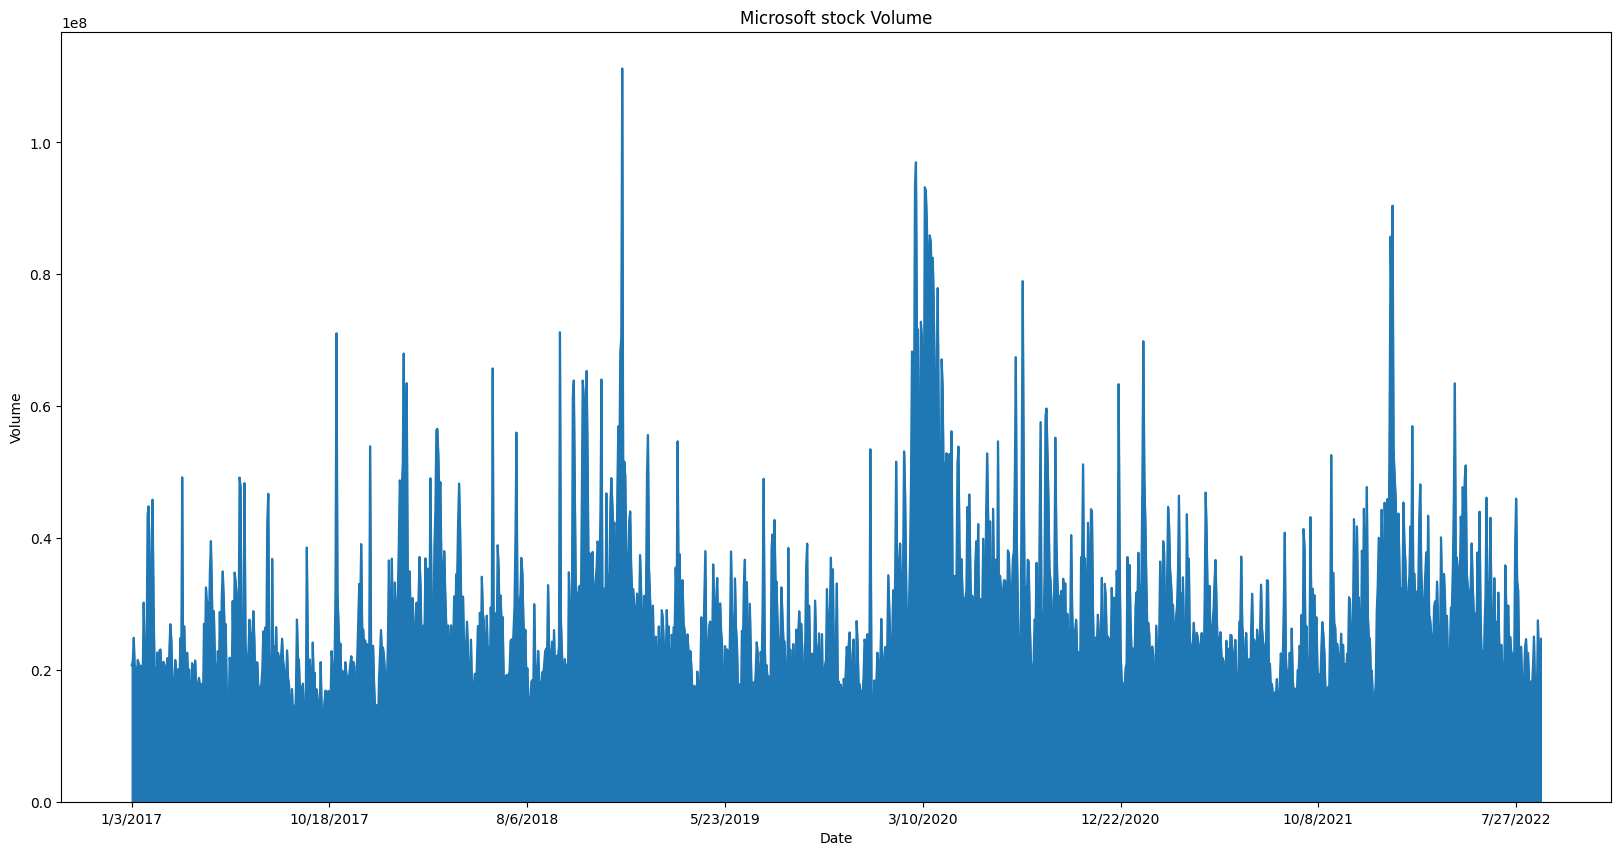

In [15]:
df.Volume.plot(kind="area", figsize=(20,10))
plt.title("Microsoft stock Volume")
plt.ylabel("Volume")
plt.xlabel("Date")

Visualize Correlation STD and Mean

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Text(0.5, 1.0, 'Mean Over Time')

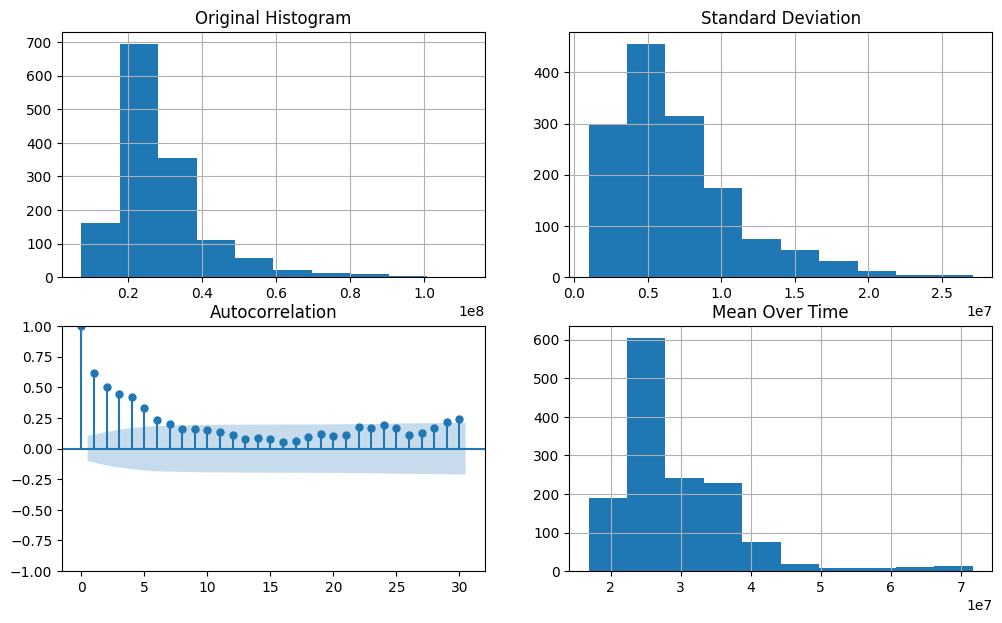

In [21]:
fig = plt.figure(figsize=(12,7))
layout= (2,2)
hist_ax=plt.subplot2grid(layout, (0,0))
ac_ax=plt.subplot2grid(layout, (1,0))
mean_ax=plt.subplot2grid(layout, (1,1))
hist_std_ax=plt.subplot2grid(layout, (0,1))


df.Volume.hist(ax=hist_ax)
hist_ax.set_title("Original Histogram")

series = df.Volume[:365]

plot_acf(series, lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

mm = df.Volume.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard Deviation")

mn = df.Volume.rolling(30).mean()
mn.hist(ax=mean_ax)
mean_ax.set_title("Mean Over Time")

Stationality check

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
x =df.Volume.values
result = adfuller(x)

In [29]:
result[1].round(6)

2e-06

Deep learning Model

RNN model
Volume forcasting using LSTM model

In [32]:
df.reset_index(inplace=True)

In [33]:
train_date = pd.DatetimeIndex(df["Date"])
train_date

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2022-08-18', '2022-08-19', '2022-08-22', '2022-08-23',
               '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-29',
               '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', name='Date', length=1426, freq=None)

In [35]:
cols = list(df)[6:7]
cols

['Volume']

In [36]:
df_for_training = df[cols].astype(float)
df_for_training

,Volume
0,20694100.0
1,21340000.0
2,24876000.0
3,19922900.0
4,20382700.0
...,...
1421,16583400.0
1422,27532500.0
1423,20338500.0
1424,22767100.0


<Axes: >

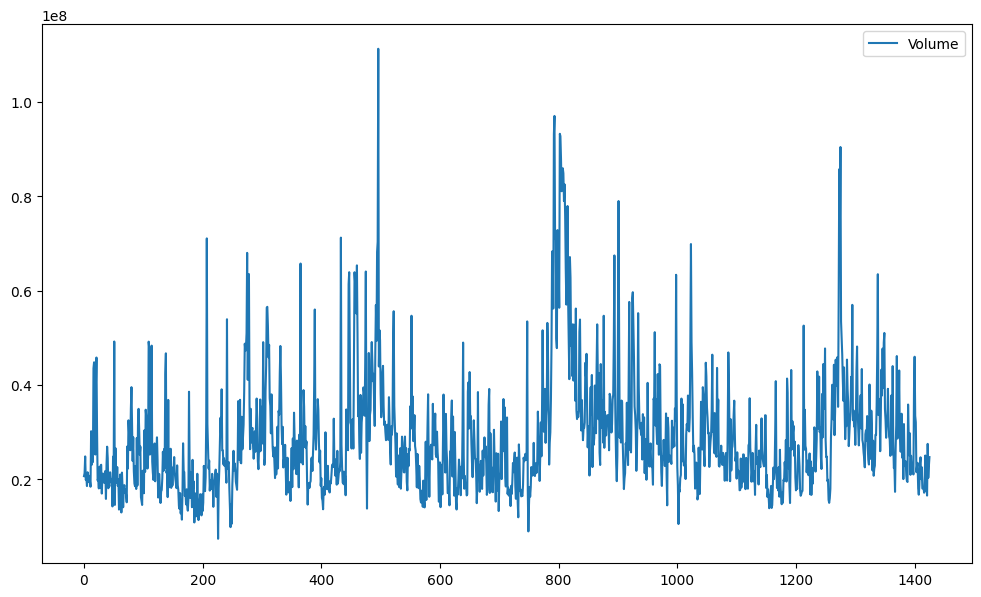

In [38]:
df_for_training.plot.line(figsize=(12,7))

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scale = StandardScaler()

In [41]:
scale = scale.fit(df_for_training)
df_scale = scale.transform(df_for_training)
df_scale

array([[-0.65050546],
       [-0.59934343],
       [-0.31925529],
       ...,
       [-0.6786727 ],
       [-0.4863022 ],
       [-0.33090715]])

In [42]:
trainX=[]
trainY= []
n_future = 1
n_past = 25

for i in range(n_past,len(df_scale)- n_future + 1):
    trainX.append(df_scale[i-n_past:i,0:df_for_training.shape[1]])
    trainY.append(df_scale[i+n_future-1:i+n_future,0])
    
    
trainX, trainY = np.array(trainX), np.array(trainY)

print(trainX.shape, trainY.shape)


(1401, 25, 1) (1401, 1)


LSTM implementation

In [43]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout, Bidirectional, BatchNormalization, Embedding

In [73]:
model = Sequential()
model.add(LSTM(32, activation="relu", input_shape= (trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation="relu"))

model.compile(optimizer="adam", loss="mse")

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 25, 32)            4352      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
Total params: 12,672
Trainable params: 12,672
Non-trainable params: 0
_________________________________________________________________


In [74]:
history = model.fit(trainX, trainY, batch_size=16, epochs=62, validation_split=0.1, verbose=1)

Epoch 1/62
79/79 [==============================] - 8s 35ms/step - loss: 0.9982 - val_loss: 0.4542
Epoch 2/62
79/79 [==============================] - 2s 29ms/step - loss: 0.9478 - val_loss: 0.4407
Epoch 3/62
79/79 [==============================] - 2s 28ms/step - loss: 0.9252 - val_loss: 0.4296
Epoch 4/62
79/79 [==============================] - 3s 32ms/step - loss: 0.8829 - val_loss: 0.4426
Epoch 5/62
79/79 [==============================] - 2s 29ms/step - loss: 0.8403 - val_loss: 0.4258
Epoch 6/62
79/79 [==============================] - 2s 30ms/step - loss: 0.8290 - val_loss: 0.4316
Epoch 7/62
79/79 [==============================] - 2s 27ms/step - loss: 0.8176 - val_loss: 0.4206
Epoch 8/62
79/79 [==============================] - 2s 29ms/step - loss: 0.7911 - val_loss: 0.4126
Epoch 9/62
79/79 [==============================] - 2s 27ms/step - loss: 0.7685 - val_loss: 0.4320
Epoch 10/62
79/79 [==============================] - 2s 29ms/step - loss: 0.7890 - val_loss: 0.4107
Epoch 11/

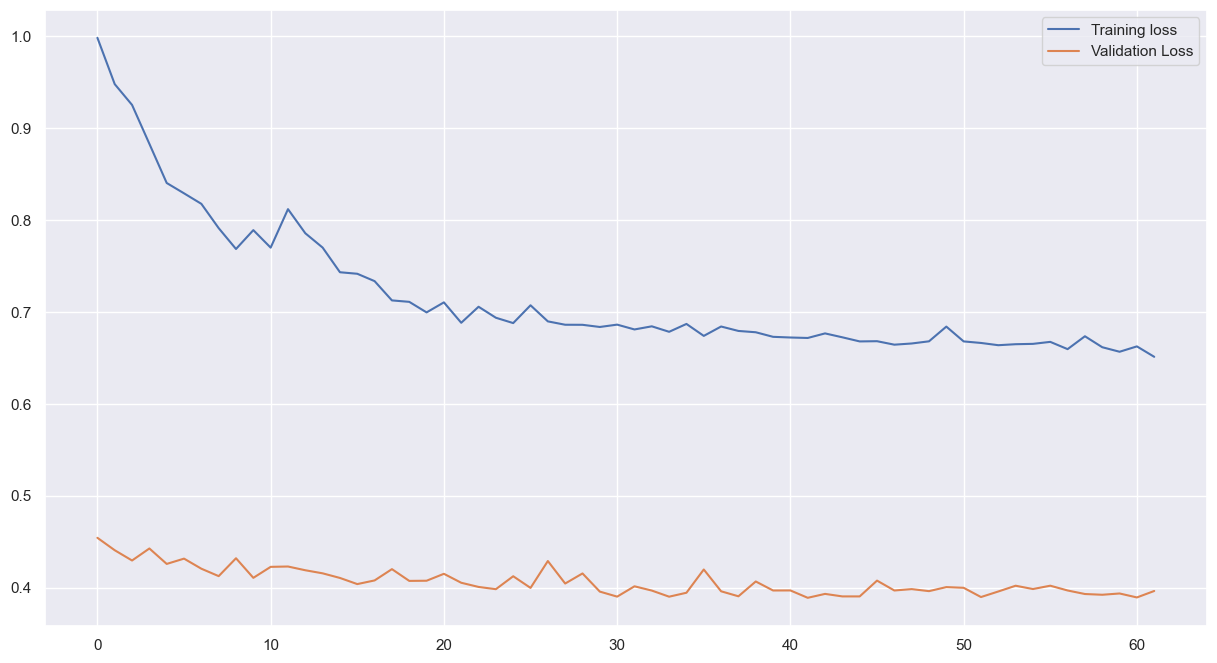

In [75]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label= "Validation Loss")
plt.legend()

In [50]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import DateOffset, CustomBusinessDay

In [51]:
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [52]:
n_past = 10
n_days_for_prediction = 100
predict_period = pd.date_range(list(train_date)[-n_past], periods=n_days_for_prediction, freq=us_bd).to_list()

In [76]:
prediction = model.predict(trainX[-n_days_for_prediction:])

4/4 [==============================] - 1s 11ms/step


In [77]:
prediction_cpy= np.repeat(prediction, df_for_training.shape[1], axis=-1)
prediction_cpy.shape

(100, 32)

In [78]:
y_pred = scale.inverse_transform(prediction_cpy)[:,0]

In [79]:
forcast_date = []
for t in predict_period:
    forcast_date.append(t.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forcast_date), 'Volume':y_pred})
df_forecast["Date"] = pd.to_datetime(df_forecast['Date'])

In [80]:
df_forecast.head()

,Date,Volume
0,2022-08-18,31422128.0
1,2022-08-19,29828354.0
2,2022-08-22,31793964.0
3,2022-08-23,30096254.0
4,2022-08-24,28963120.0


C:\Users\Oloye\AppData\Local\Temp\ipykernel_7356\195106151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original["Date"] = pd.to_datetime(original["Date"])


<Axes: xlabel='Date', ylabel='Volume'>

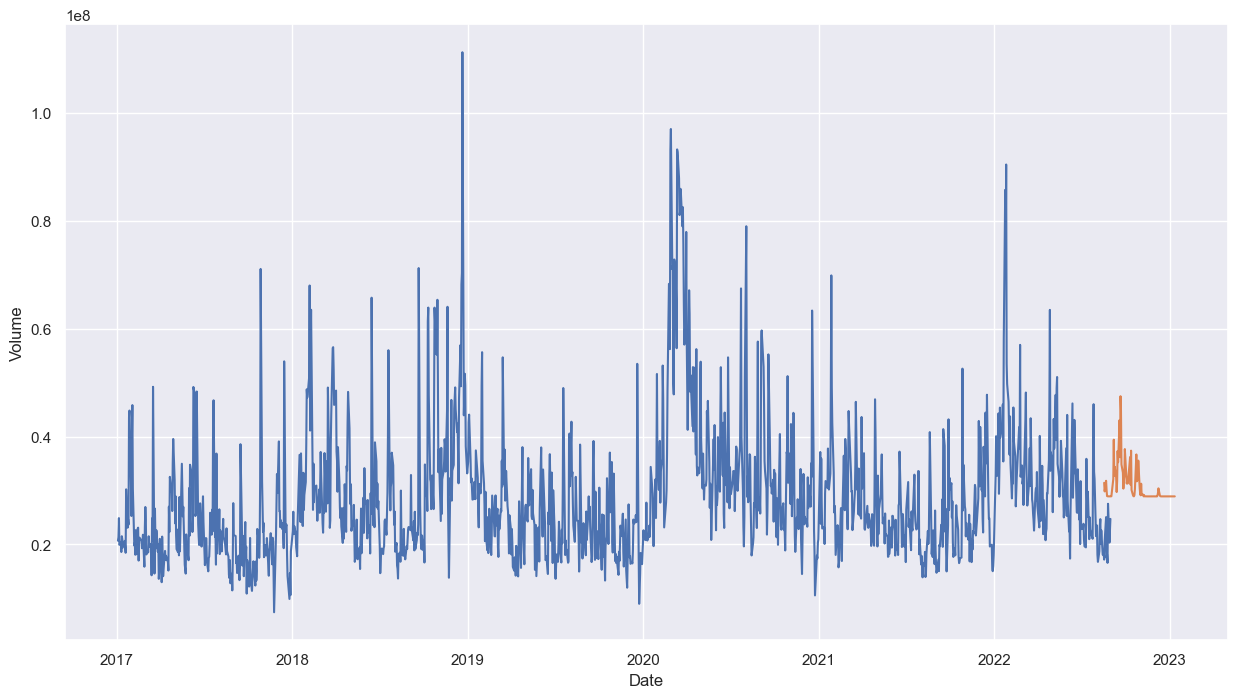

In [81]:
original = df[["Date", "Volume"]]
original["Date"] = pd.to_datetime(original["Date"])
original = original.loc[original["Date"]>= "2017-1-3"]



sns.set(rc={"figure.figsize": (15,8)})
sns.lineplot(x =original["Date"], y=original["Volume"])
sns.lineplot(x=df_forecast["Date"], y=df_forecast["Volume"])

In [71]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 0 to 1425
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1426 non-null   datetime64[ns]
 1   Volume  1426 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 33.4 KB


Bidorectional LSTM

In [96]:
model = Sequential()
# model.build(input_shape= (trainX.shape[1], trainX.shape[2]))
model.add(Bidirectional(LSTM(32, activation="relu"), input_shape= (trainX.shape[1], trainX.shape[2])))

# model.add(LSTM(32, activation="relu"))

# model.add(Dense(trainY.shape[1]))
model.compile(optimizer="adam", loss="mse")

# model.summary()

In [97]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_9 (Bidirectio  (None, 64)               8704      
 nal)                                                            
                                                                 
Total params: 8,704
Trainable params: 8,704
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model.fit(trainX, trainY, batch_size=16, epochs=62, validation_split=0.1, verbose=1)

Epoch 1/62
79/79 [==============================] - 12s 32ms/step - loss: 1.0897 - val_loss: 0.4513
Epoch 2/62
79/79 [==============================] - 1s 17ms/step - loss: 0.9849 - val_loss: 0.4512
Epoch 3/62
79/79 [==============================] - 2s 26ms/step - loss: 0.9591 - val_loss: 0.4492
Epoch 4/62
79/79 [==============================] - 2s 30ms/step - loss: 0.9672 - val_loss: 0.4473
Epoch 5/62
79/79 [==============================] - 2s 26ms/step - loss: 0.9517 - val_loss: 0.4458
Epoch 6/62
79/79 [==============================] - 2s 21ms/step - loss: 0.9248 - val_loss: 0.4431
Epoch 7/62
79/79 [==============================] - 2s 23ms/step - loss: 0.9000 - val_loss: 0.4415
Epoch 8/62
79/79 [==============================] - 2s 21ms/step - loss: 0.8778 - val_loss: 0.4330
Epoch 9/62
79/79 [==============================] - 2s 21ms/step - loss: 0.8507 - val_loss: 0.4358
Epoch 10/62
79/79 [==============================] - 2s 26ms/step - loss: 0.8375 - val_loss: 0.4281
Epoch 11

4/4 [==============================] - 1s 5ms/step


C:\Users\Oloye\AppData\Local\Temp\ipykernel_7356\2345398356.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original["Date"] = pd.to_datetime(original["Date"])


<Axes: xlabel='Date', ylabel='Volume'>

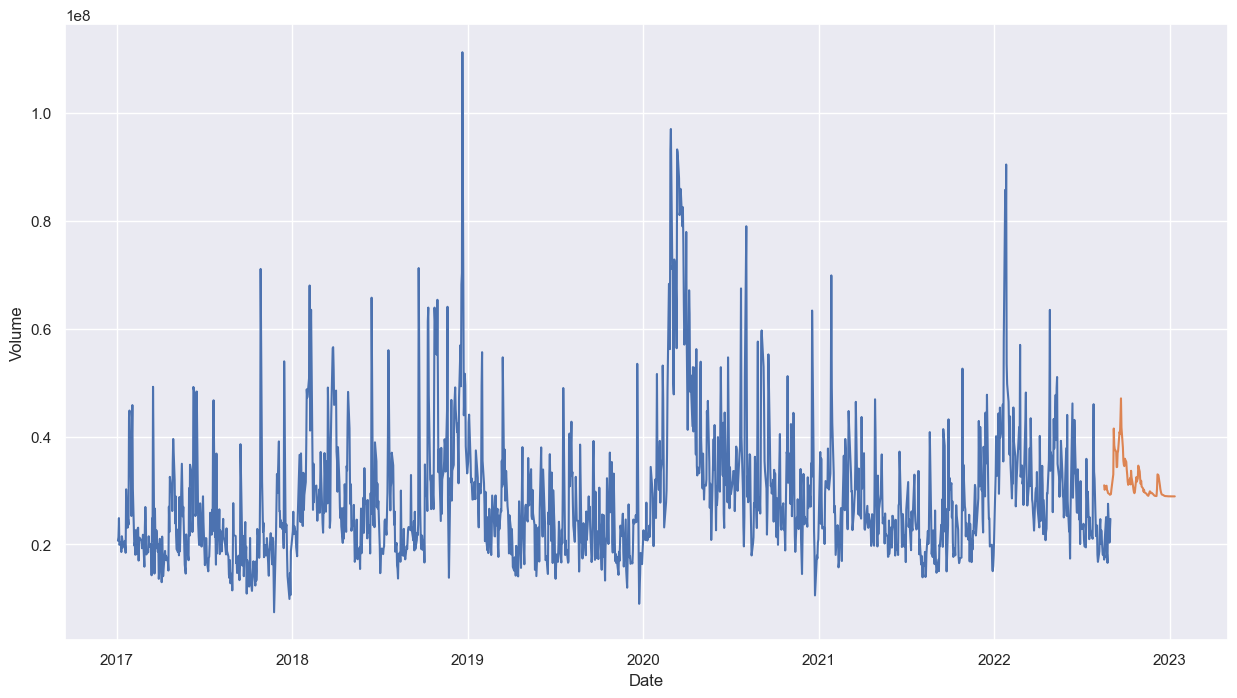

In [99]:
prediction = model.predict(trainX[-n_days_for_prediction:])
prediction_cpy= np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred = scale.inverse_transform(prediction_cpy)[:,0]


forcast_date = []
for t in predict_period:
    forcast_date.append(t.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forcast_date), 'Volume':y_pred})
df_forecast["Date"] = pd.to_datetime(df_forecast['Date'])

original = df[["Date", "Volume"]]
original["Date"] = pd.to_datetime(original["Date"])
original = original.loc[original["Date"]>= "2017-1-3"]



sns.set(rc={"figure.figsize": (15,8)})
sns.lineplot(x =original["Date"], y=original["Volume"])
sns.lineplot(x=df_forecast["Date"], y=df_forecast["Volume"])